# Dimensionality Reduction

The purpose of following notebook is to gain understanding and exploring methods for dimensionality reduction. 

### Curse of dimensionality
https://en.wikipedia.org/wiki/Curse_of_dimensionality 

As the number of features grow large, training will be slow and finding a good solution can be hard. 

https://arxiv.org/pdf/2004.03922.pdf

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

from itertools import product, combinations
from matplotlib.patches import Rectangle
#%matplotlib notebook

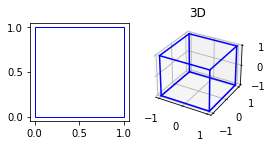

In [2]:
fig = plt.figure()

ax = fig.add_subplot(132)
ax.add_patch(Rectangle((0, 0), 1, 1, color = "blue", fc = "White"))
plt.axis('scaled')

# 3D Cube
ax = fig.add_subplot(133, projection='3d')
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="blue")
ax.set_title("3D")

plt.show()

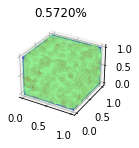

In [55]:
n = 100000;
d = 3;
dt = np.random.uniform(0, 1, size=(n, d));

threshold = 0.001;
extreme = np.zeros(n);
for i in range(n):
    for k in dt[i,:]:
        if k < threshold or k > 1-threshold:
            extreme[i] = 1;

fig = plt.figure()
alphas = np.ones(n);
for i in range(n):
    if extreme[i] == 0:
        alphas[i] = 0.05;

#ax = fig.add_subplot(132)
#ax.add_patch(Rectangle((0, 0), 1, 1, color = "blue", fc = "White"))
#plt.axis('scaled')

# 3D Cube
ax = fig.add_subplot(133, projection='3d')
r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="blue")
ax.set_title("{:0.4f}%".format((sum(extreme)/n)*100))
ax.scatter(dt[:,0], dt[:,1], dt[:,2], zdir='z', c = extreme, cmap = mcolors.ListedColormap(["lightgreen", "darkred"]),
          alpha=alphas)

plt.show()

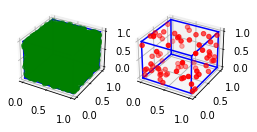

In [50]:
n = 10000;
d = 3;
dt = np.random.uniform(0, 1, size=(n, d));

threshold = 0.001;
extreme = [];
for i in range(n):
    for k in dt[i,:]:
        if k < threshold or k > 1-threshold:
            extreme.append(i);

fig = plt.figure()

#ax = fig.add_subplot(132)
#ax.add_patch(Rectangle((0, 0), 1, 1, color = "blue", fc = "White"))
#plt.axis('scaled')

# 3D Cube
ax = fig.add_subplot(132, projection='3d')
r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="blue")
#ax.set_title("{:0.3f}%".format((sum(extreme)/n)*100))
ax.scatter(dt[:,0], dt[:,1], dt[:,2], zdir='z', c = "green")

ax = fig.add_subplot(133, projection='3d')
r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="blue")
#ax.set_title("{:0.3f}%".format((sum(extreme)/n)*100))
ax.scatter(dt[extreme,0], dt[extreme,1], dt[extreme,2], zdir='z', c = "red")

plt.show()

We could simulate high dimensions, but it is more time efficient to solve in theory instead.  We define an extreme point of being 0.001 from any boundary in a d-dimensional unit cube. This is the same as being outside of a cube with side length $1 - 2*0.001$, if both cubes share the same centroid. 

Let **d** detonate our dimension, then the corresponding volum for determining extreme points would be $(1-2*0.001)^d$ in dimension d.

$$
1-(1-2*0.001)^2 \approx 0.3996 \%
$$ 

$$
1-(1-2*0.001)^3 \approx 0.5988 \%
$$

$$
1-(1-2*0.001)^{10} \approx 1.982 \%
$$ 

$$
1-(1-2*0.001)^{10,000} \approx 99.999999798 \%
$$

In [4]:
from datasets import *

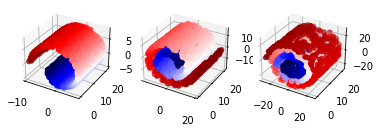

In [5]:
fig = plt.figure()

k = 3
for i in range(k):
    X, t = create_swiss_roll(n = 2000, rolls = 1+i, noise = 0, seed = None)
    ax = fig.add_subplot(1, k, 1+i, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c= t, cmap="seismic")
    
plt.show()

## Locally Linear Embedding (LLE)

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

In [7]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

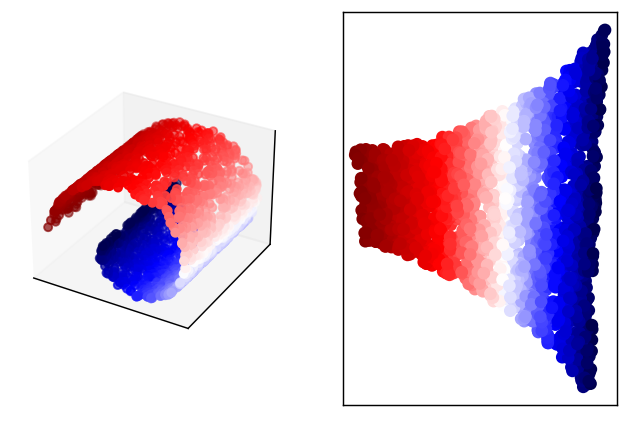

In [34]:
fig = plt.figure(dpi = 130)
X, t = create_swiss_roll(n = 2000, rolls = 1, noise = 0, seed = None)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c= t, cmap="seismic")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_zaxis().set_ticks([])

X_reduced = lle.fit_transform(X)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c= t, cmap="seismic")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.show()

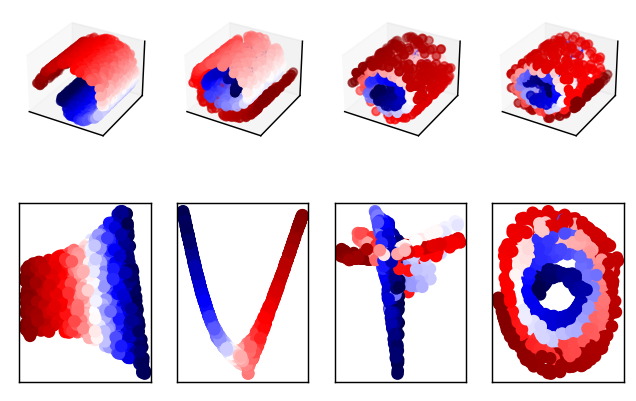

In [9]:
fig = plt.figure(dpi = 130)

k = 4 # Number of plots
for i in range(k):
    # Creating swiss roll
    X, t = create_swiss_roll(n = 1000, rolls = 1+i, noise = 0, seed = None)
    
    ax = fig.add_subplot(2, k, 1+i, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c= t, cmap="seismic")
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_zaxis().set_ticks([])
    
    # Corresponing LLE
    X_reduced = lle.fit_transform(X)
    
    ax = fig.add_subplot(2, k, k+1+i)
    ax.scatter(X_reduced[:,0], X_reduced[:,1], c= t, cmap="seismic")
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

### These images can look quite different

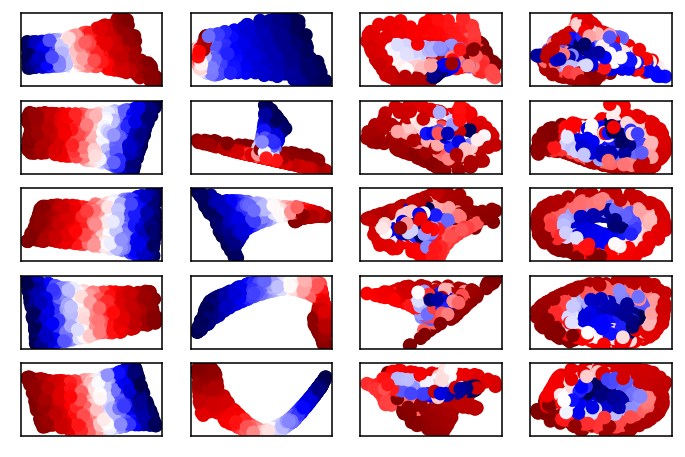

In [10]:
fig = plt.figure(dpi = 140)

k = 4;          # Number of plots
repeat = 5;     # Repeated measurments
for i in range(repeat):
    for j in range(k):
        # Creating swiss roll
        X, t = create_swiss_roll(n = 1000, rolls = 1+j, noise = 0, seed = None)
    
        # Corresponing LLE
        X_reduced = lle.fit_transform(X)
        
        ax = fig.add_subplot(repeat, k, 1+j+i*k)
        ax.scatter(X_reduced[:,0], X_reduced[:,1], c= t, cmap="seismic")
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])